## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:

# df1 = mouse_metadata.join(study_results.set_index('Mouse ID'),on='Mouse ID')
df1 = pd.merge(mouse_metadata, study_results,on='Mouse ID',how='left')
df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
# mice_num =df1.groupby(['Mouse ID']).count()
len(df1['Mouse ID'].unique())


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mice_num =df1.groupby(['Mouse ID']).count()
# mice_num.sort_values(by=['Timepoint'], ascending=False)
df2 = df1[df1.duplicated(subset=['Timepoint','Mouse ID'],keep=False)]
duplicate=df2['Mouse ID'].unique()
duplicate1=duplicate[0]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dfc=df1[df1['Mouse ID']!=duplicate1]
dfc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(dfc['Mouse ID'].unique())


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
mean1 = dfc.groupby(['Drug Regimen']).mean()
mean2 =mean1[['Tumor Volume (mm3)']]
mean2 =mean2.rename(columns={'Tumor Volume (mm3)':'mean'})
median1 = dfc.groupby(['Drug Regimen']).median()
median2 =median1[['Tumor Volume (mm3)']]
median2 =median2.rename(columns={'Tumor Volume (mm3)':'median'})
var1 = dfc.groupby(['Drug Regimen']).var()
var2 =var1[['Tumor Volume (mm3)']]
var2 =var2.rename(columns={'Tumor Volume (mm3)':'variance'})
std1 = dfc.groupby(['Drug Regimen']).std()
std2 =std1[['Tumor Volume (mm3)']]
std2 = std2.rename(columns={'Tumor Volume (mm3)':'St Dev'})
sem1 = dfc.groupby(['Drug Regimen']).std()
sem2 =sem1[['Tumor Volume (mm3)']]
sem2 = sem2.rename(columns={'Tumor Volume (mm3)':'SEM'})

df11 = pd.merge(mean2,median2,on='Drug Regimen',how='left')
df12 = pd.merge(var2,std2,on='Drug Regimen',how='left')
df13 = pd.merge(df12,sem2,on='Drug Regimen',how='left')
df14 =pd.merge(df13,df11,on='Drug Regimen',how='left')
df14

,variance,St Dev,SEM,mean,median
Drug Regimen,,,,,
Capomulin,24.947764,4.994774,4.994774,40.675741,41.557809
Ceftamin,39.290177,6.268188,6.268188,52.591172,51.776157
Infubinol,43.128684,6.567243,6.567243,52.884795,51.820584
Ketapril,68.553577,8.279709,8.279709,55.235638,53.698743
Naftisol,66.173479,8.134708,8.134708,54.331565,52.509285
Placebo,61.168083,7.821003,7.821003,54.033581,52.288934
Propriva,43.852013,6.622085,6.622085,52.320930,50.446266
Ramicane,23.486704,4.846308,4.846308,40.216745,40.673236
Stelasyn,59.450562,7.710419,7.710419,54.233149,52.431737


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

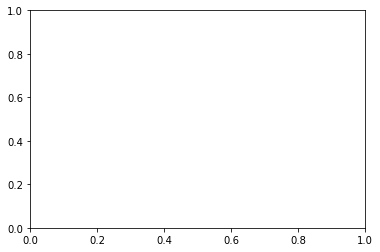

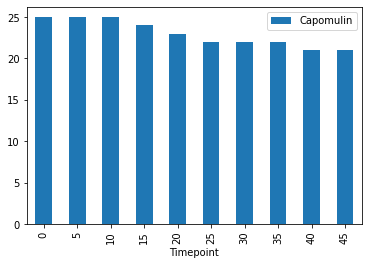

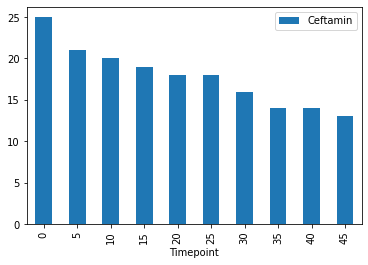

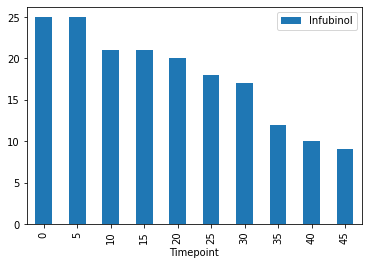

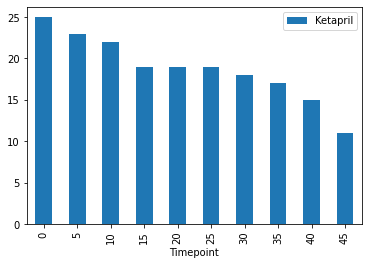

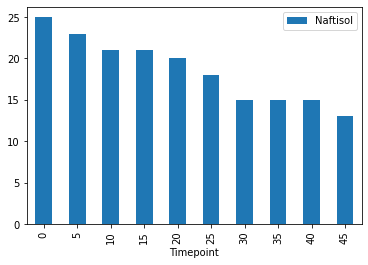

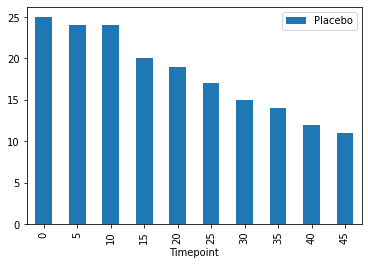

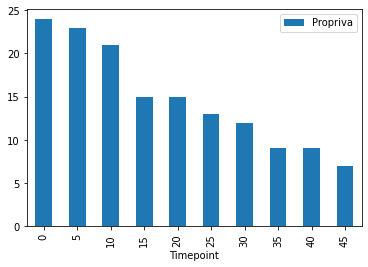

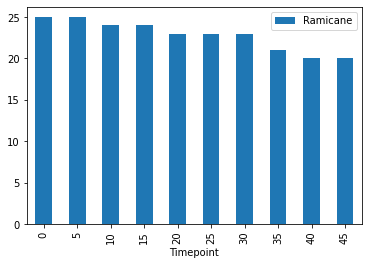

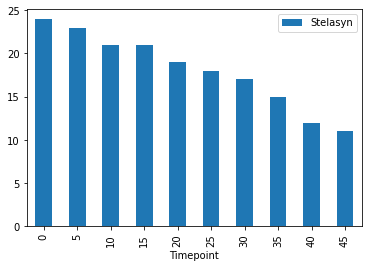

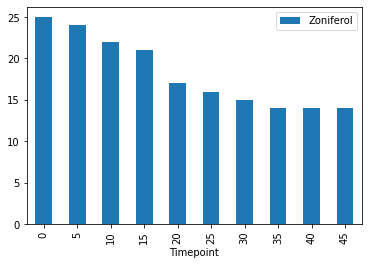

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
Drugs = df14.index.values
ax = plt.subplot(111)
for drug in Drugs:
    dfc2 =dfc[dfc['Drug Regimen']==drug]
    dfc1=dfc2.groupby('Timepoint').count()
    dfc1=dfc1[['Mouse ID']]
#     plt.bar(np.vectorize(dfc1.index.values),np.vectorize(dfc1[['Mouse ID']]))
    dfc1 =dfc1.rename(columns={'Mouse ID':drug})
    dfc1.plot(kind='bar')
#     plts.savefig(drug+'.png',dpi=400)

plt.show()
    

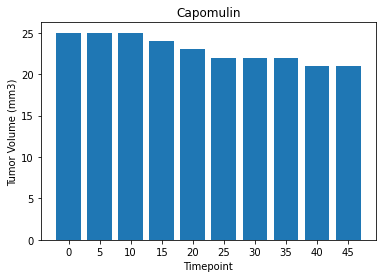

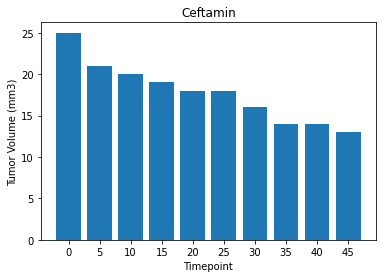

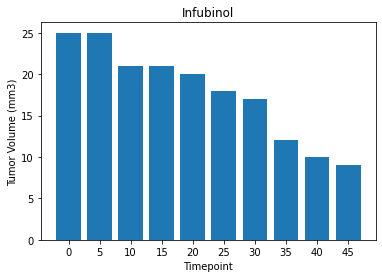

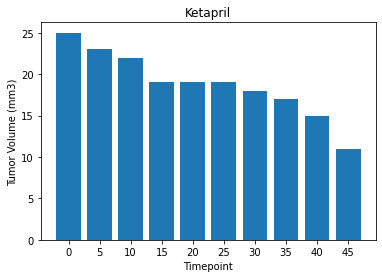

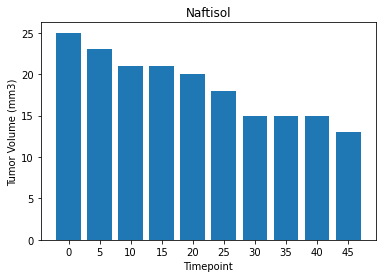

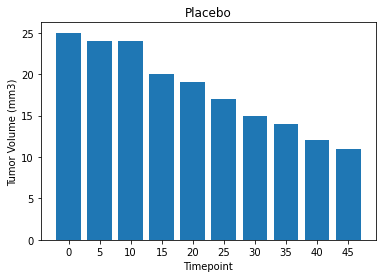

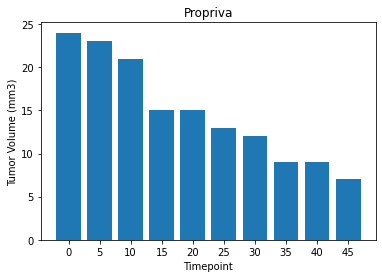

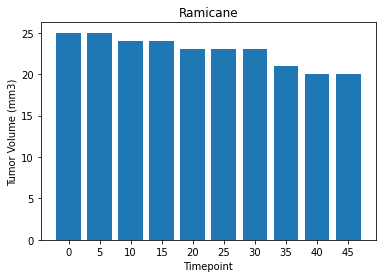

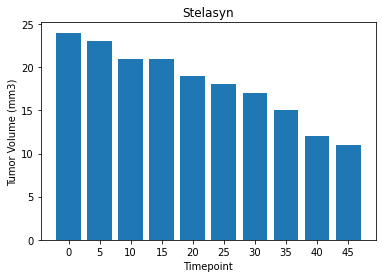

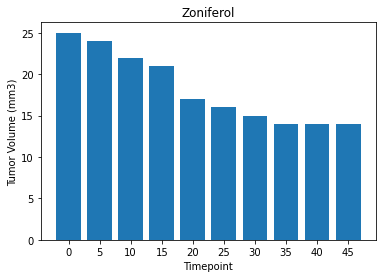

In [80]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# dfc1.plot
# plt.show()

Drugs = df14.index.values
ax = plt.subplot(111)
xx = np.arange(0,50,5)
for drug in Drugs:
    dfc2 =dfc[dfc['Drug Regimen']==drug]
    dfc1=dfc2.groupby('Timepoint').count()
    dfc1=dfc1[['Mouse ID']]
    xaxis=np.arange(len(dfc1.index))
#     plt.bar(np.vectorize(dfc1.index.values),np.vectorize(dfc1[['Mouse ID']]))
    dfc1 =dfc1.rename(columns={'Mouse ID':drug})
#   dfc1.plot(kind='bar')
#     autolabel(plotter)
    plotter =dfc1[drug].tolist()
    plt.title(drug)
    
    plt.xticks(xaxis,xx)
    plt.bar(xaxis,plotter)
    plt.ylabel('Tumor Volume (mm3)')
    plt.xlabel('Timepoint')
    plt.show()
 
#     plts.savefig(drug+'.png',dpi=400)

# plt.show()
# dfc1[[drug]]

## Pie Plots

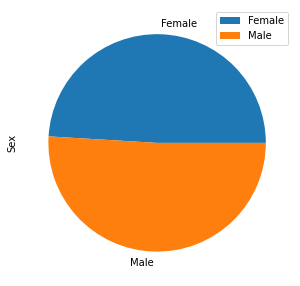

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex1 =dfc.groupby(['Sex']).count()
sex1=sex1[['Mouse ID']]
sex1 =sex1.rename(columns={'Mouse ID':'Sex'})
sex1.plot.pie(y='Sex',figsize=(5, 5))

<ipython-input-14-0882646d8abd>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,


([<matplotlib.patches.Wedge at 0x226616ae400>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.04%'),
  Text(0.39932117891546515, 0.4478198254539018, '50.96%')])

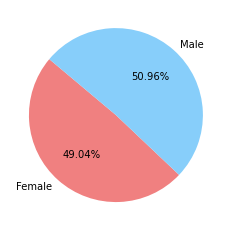

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex1.index.values
sizes = sex1[['Sex']]
explode = ( 0, 0)
colors = ["lightcoral", "lightskyblue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.2f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_old =dfc.groupby('Mouse ID').max()
tumor_time = tumor_old[['Timepoint']]
dfc_new =dfc.set_index(['Mouse ID'])
tumor_fix=pd.merge(dfc_new,tumor_time,on='Mouse ID',how='left')
tumor = tumor_fix[tumor_fix['Timepoint_x']==tumor_fix['Timepoint_y']]

tumor2 = tumor.groupby('Drug Regimen').mean()
tumor2= tumor2[['Tumor Volume (mm3)']]
tumor2 = tumor2.sort_values(by=['Tumor Volume (mm3)'])
tumor3=tumor2.head(4)
# fig1, ax1 = plt.subplots()
outliers=[]
for drug in Drugs:
    tum_looper =tumor[tumor['Drug Regimen']==drug]
    tum_looper=tum_looper[['Tumor Volume (mm3)']]
    q0=round(tum_looper['Tumor Volume (mm3)'].quantile(0),2)
    q4=round(tum_looper['Tumor Volume (mm3)'].quantile(1),2)
    q1=round(tum_looper['Tumor Volume (mm3)'].quantile(.25),2)
    q3=round(tum_looper['Tumor Volume (mm3)'].quantile(.75),2)
    IQR = q3-q1
    lower_bound =round(q1-(1.5*IQR),2)
    upper_bound =round(q3-(1.5*IQR),2)
    print(drug)
    print(f"lower bound is {lower_bound}")
    print(f"min value is {q0}")
    print(f"lower quartile is {q1}")
    print(f"upper quartile is {q3}")
    print(f"max value is {q4}")
    print(f"upper bound is {upper_bound}")
    if q4>upper_bound:
        outliers.append(drug)
   #     if (tumor3['Tumor Volume (mm3)'].index.values==drug).any():
#         fig1, ax1 = plt.subplots()       
#         ax1.boxplot(tum_looper['Tumor Volume (mm3)'].tolist())
#         plt.show()

        
        
print("The 4 most promisting Drug Regimens by tumor volume are") 
print(tumor3['Tumor Volume (mm3)'].index.values)
print('Drug regimens with large tumor volume outliers')
print(outliers)




Capomulin
lower bound is 20.71
min value is 23.34
lower quartile is 32.38
upper quartile is 40.16
max value is 47.69
upper bound is 28.49
Ceftamin
lower bound is 25.35
min value is 45.0
lower quartile is 48.72
upper quartile is 64.3
max value is 68.92
upper bound is 40.93
Infubinol
lower bound is 36.83
min value is 36.32
lower quartile is 54.05
upper quartile is 65.53
max value is 72.23
upper bound is 48.31
Ketapril
lower bound is 36.99
min value is 45.0
lower quartile is 56.72
upper quartile is 69.87
max value is 78.57
upper bound is 50.14
Naftisol
lower bound is 25.86
min value is 45.0
lower quartile is 52.08
upper quartile is 69.56
max value is 76.67
upper bound is 43.34
Placebo
lower bound is 30.16
min value is 45.0
lower quartile is 52.94
upper quartile is 68.13
max value is 73.21
upper bound is 45.34
Propriva
lower bound is 28.76
min value is 45.0
lower quartile is 49.12
upper quartile is 62.69
max value is 72.46
upper bound is 42.33
Ramicane
lower bound is 17.91
min value is 22.

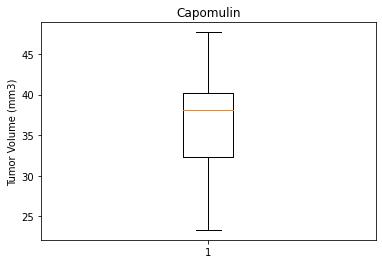

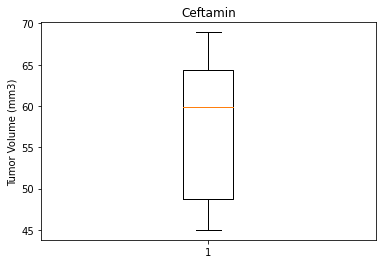

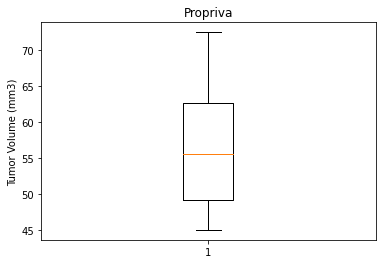

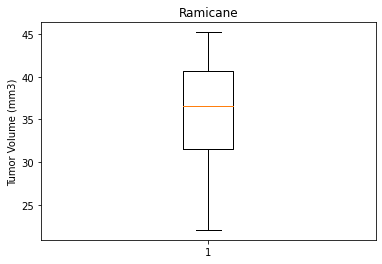

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for drug in Drugs:
    tum_looper =tumor[tumor['Drug Regimen']==drug]
    tum_looper=tum_looper[['Tumor Volume (mm3)']]
    if (tumor3['Tumor Volume (mm3)'].index.values==drug).any():
        fig1, ax1 = plt.subplots() 
        ax1.set_title(drug)
        ax1.set_ylabel('Tumor Volume (mm3)')
        ax1.boxplot(tum_looper['Tumor Volume (mm3)'].tolist())
        plt.show()


## Line and Scatter Plots

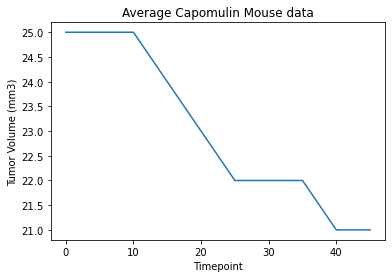

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Drugs = df14.index.values
# ax = plt.subplot(111)
drug='Capomulin'
dfc2 =dfc[dfc['Drug Regimen']==drug]
dfc1=dfc2.groupby('Timepoint').count()
dfc1=dfc1[['Mouse ID']]
#     plt.bar(np.vectorize(dfc1.index.values),np.vectorize(dfc1[['Mouse ID']]))
dfc1 =dfc1.rename(columns={'Mouse ID':drug})
plt.title(f"Average {drug} Mouse data")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.plot(dfc1)
    
#     plts.savefig(drug+'.png',dpi=400)

plt.show()

The r-squared is: 0.27636002234559165


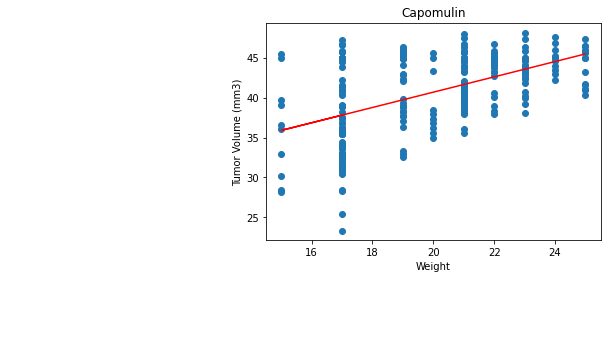

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo=dfc[dfc['Drug Regimen']==drug]

x_values = capo['Weight (g)']
y_values =capo['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'{drug}')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
